# Final Project - Group 8

## Team members:

- Li-Hsin Fu 
- Ming-Tse Chen
- Jihui Sheng

# 1.1 Data collection and Data cleaning

We found an interesting dataset of daily calorie intake of many countries from [ourworldindata](https://ourworldindata.org/grapher/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat?tab=table).

Our objective is to **build a predictive model of GDP** based on daily intake from animal protein, vegetal protein, fat, and carbohydrates.

We'll start by reviewing the dataset and performing some preprocessing. The data is spread across three tables, each detailing different types of daily energy intake. Merging these tables is straightforward due to the consistent values across them.

After removing the years with missing GDP data, we'll proceed to merge the cleaned tables.

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# read file
file_list =['share-of-dietary-energy-derived-from-protein-vs-gdp-per-capita',
           'share-of-dietary-energy-supply-from-carbohydrates-vs-gdp-per-capita',
           'share-of-dietary-energy-supply-from-fats-vs-gdp-per-capita']
df_list = []
for i in range(len(file_list)):
    df = pd.read_csv(file_list[i] + '.csv')
    # drop na on col GDP and Population.
    df = df.iloc[:, :-1]
    df_cleaned = df.dropna(subset=[df.columns[4], df.columns[5]])
    df_list.append(df_cleaned)
    print(df_list[i].head())

         Entity Code  Year  \
42  Afghanistan  AFG  2002   
43  Afghanistan  AFG  2003   
44  Afghanistan  AFG  2004   
45  Afghanistan  AFG  2005   
46  Afghanistan  AFG  2006   

    Share of the daily caloric intake that comes from protein  \
42                                          11.686747           
43                                          11.530656           
44                                          11.233350           
45                                          10.987680           
46                                          10.876907           

    GDP per capita, PPP (constant 2017 international $)  \
42                                          1280.4631     
43                                          1292.3335     
44                                          1260.0605     
45                                          1352.3207     
46                                          1366.9932     

    Population (historical estimates)  
42                         210002

In [2]:
# combine the data with reduce
from functools import reduce
final_merged_df = reduce(lambda left, right: pd.merge(left,
                                                      right,
                                                      on=['Entity', 
                                                          'Code', 
                                                          'Year',
                                                          'GDP per capita, PPP (constant 2017 international $)',
                                                          'Population (historical estimates)'],
                                                      how='inner'), df_list)
final_merged_df.head()

,Entity,Code,Year,Share of the daily caloric intake that comes from protein,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Share of the daily caloric intake that comes from carbohydrates,Share of the daily caloric intake that comes from fat
0,Afghanistan,AFG,2002,11.686747,1280.4631,21000258.0,73.55148,14.761776
1,Afghanistan,AFG,2003,11.530656,1292.3335,22645136.0,74.20348,14.265856
2,Afghanistan,AFG,2004,11.233350,1260.0605,23553554.0,72.77529,15.991359
3,Afghanistan,AFG,2005,10.987680,1352.3207,24411196.0,72.03337,16.978952
4,Afghanistan,AFG,2006,10.876907,1366.9932,25442946.0,74.87232,14.250762


In [3]:
# rename and rearrange column
df_renamed = final_merged_df.rename(columns={'Entity': 'Country',
                                'Code': 'Country_Code',
                                'Share of the daily caloric intake that comes from protein': 'DailyC_Protein',
                                'Share of the daily caloric intake that comes from carbohydrates': 'DailyC_Carbohydrates',
                                'Share of the daily caloric intake that comes from fat': 'DailyC_Fat',
                                'GDP per capita, PPP (constant 2017 international $)':'GDP',
                               'Population (historical estimates)': 'Population'})
new_order = ['Country',
             'Country_Code',
             'Year',
             'DailyC_Protein',
             'DailyC_Fat',
             'DailyC_Carbohydrates',
             'GDP',
            'Population']

new_sec_df = df_renamed[new_order]
new_sec_df.head()

,Country,Country_Code,Year,DailyC_Protein,DailyC_Fat,DailyC_Carbohydrates,GDP,Population
0,Afghanistan,AFG,2002,11.686747,14.761776,73.55148,1280.4631,21000258.0
1,Afghanistan,AFG,2003,11.530656,14.265856,74.20348,1292.3335,22645136.0
2,Afghanistan,AFG,2004,11.233350,15.991359,72.77529,1260.0605,23553554.0
3,Afghanistan,AFG,2005,10.987680,16.978952,72.03337,1352.3207,24411196.0
4,Afghanistan,AFG,2006,10.876907,14.250762,74.87232,1366.9932,25442946.0


Here, we have successfully obtained the initial data we need.

# 1.2 Data Exploration
We are not yet familiar with the structure of our data or the number of rows it contains, so we need to investigate this.

In [4]:
len(new_sec_df)

6090

In [5]:
unique_entity = new_sec_df['Country'].unique()
unique_entity

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'European Union (27)', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
    

In [6]:
num_unique_entity = new_sec_df['Country'].nunique()
num_unique_entity

200

In [7]:
new_sec_df['Year'].min(),new_sec_df['Year'].max()

(1990, 2021)

In [8]:
frequency = new_sec_df['Year'].value_counts()
frequency

Year
2018    200
2013    200
2017    200
2016    200
2015    200
2014    200
2019    199
2020    198
2012    198
2011    198
2009    197
2010    197
2008    196
2021    196
2007    195
2006    195
2005    194
2004    194
2002    193
2003    193
2001    192
2000    191
1999    186
1997    185
1998    185
1995    182
1996    182
1994    172
1993    170
1992    169
1991    167
1990    166
Name: count, dtype: int64

Here, we categorize all the countries and integrate them into continental data sets.

In [9]:
countries_by_continent = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
               'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of Congo',
               'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
               'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
               'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
               'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
               'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo',
               'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei',
             'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
             'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
             'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',
             'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria',
             'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
             'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
               'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
               'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
               'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
               'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia',
               'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
                      'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti',
                      'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis',
                      'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
                      'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand',
                'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
}

In [10]:
countries_with_states = {}

for continent, countries in countries_by_continent.items():
    for country in countries:
        countries_with_states[country] = continent

In [11]:
countries_with_states = {}

for continent, countries in countries_by_continent.items():
    for country in countries:
        countries_with_states[country] = continent

In [12]:
new_df = new_sec_df.copy()

We label each country with its respective continent.

In [13]:
new_df['Continent'] = new_df['Country'].map(countries_with_states)
new_df.head()

,Country,Country_Code,Year,DailyC_Protein,DailyC_Fat,DailyC_Carbohydrates,GDP,Population,Continent
0,Afghanistan,AFG,2002,11.686747,14.761776,73.55148,1280.4631,21000258.0,Asia
1,Afghanistan,AFG,2003,11.530656,14.265856,74.20348,1292.3335,22645136.0,Asia
2,Afghanistan,AFG,2004,11.233350,15.991359,72.77529,1260.0605,23553554.0,Asia
3,Afghanistan,AFG,2005,10.987680,16.978952,72.03337,1352.3207,24411196.0,Asia
4,Afghanistan,AFG,2006,10.876907,14.250762,74.87232,1366.9932,25442946.0,Asia


In [14]:
# Print the value counts for categorical columns
for col in new_df.columns:
    # print(new_sec_df[col])
    if col in ['Country', 'Continent']:
        print('\nColumn Name:', col,)
        print(new_df[col].value_counts())


Column Name: Country
Country
Lesotho                      32
Portugal                     32
Morocco                      32
Mozambique                   32
Myanmar                      32
                             ..
Kosovo                       14
Turks and Caicos Islands     11
Sint Maarten (Dutch part)    10
Somalia                       9
Djibouti                      9
Name: count, Length: 200, dtype: int64

Column Name: Continent
Continent
Africa           1524
Asia             1364
Europe           1186
North America     697
Oceania           392
South America     352
Name: count, dtype: int64


We've consolidated the data from all countries into continent-based datasets.

In [15]:
value_list = new_order[3:]
continent_yearly_df = new_df.groupby(['Continent', 'Year'])[value_list].mean().reset_index()
continent_yearly_df

,Continent,Year,DailyC_Protein,DailyC_Fat,DailyC_Carbohydrates,GDP,Population
0,Africa,1990,10.120920,18.941392,70.937687,3676.433424,1.342003e+07
1,Africa,1991,10.091521,18.905594,71.002885,3685.117040,1.379256e+07
2,Africa,1992,10.161255,19.412889,70.425857,3657.913322,1.415937e+07
3,Africa,1993,10.166156,18.979388,70.854455,3613.698646,1.451960e+07
4,Africa,1994,10.148090,18.647806,71.204104,3588.556416,1.487957e+07
...,...,...,...,...,...,...,...
187,South America,2017,11.911615,27.171798,60.916587,15998.342818,3.546784e+07
188,South America,2018,12.080655,27.153194,60.766150,16134.717818,3.587589e+07
189,South America,2019,12.140685,28.124629,59.734684,16089.069636,3.627806e+07
190,South America,2020,12.226233,28.375606,59.398164,15293.827545,3.661317e+07


In [16]:
frequency_continent_year = continent_yearly_df['Year'].value_counts()
frequency_continent_year.keys().min(),frequency_continent_year.keys().max()

(1990, 2021)

In [17]:
continent_pivot = continent_yearly_df.pivot(index='Year', columns='Continent', values=value_list)
continent_pivot.head()

DailyC_Protein                                                 \
Continent         Africa       Asia     Europe North America    Oceania   
Year                                                                      
1990           10.120920  10.492502  12.294939     10.713146  10.862344   
1991           10.091521  10.548956  12.307032     10.705814  10.788659   
1992           10.161255  10.944202  12.133946     10.593876  10.669897   
1993           10.166156  10.875414  12.112534     10.587474  10.815737   
1994           10.148090  10.947285  12.151128     10.674410  10.679290   

                        DailyC_Fat                                      ...  \
Continent South America     Africa       Asia     Europe North America  ...   
Year                                                                    ...   
1990          10.432364  18.941392  21.220931  35.068135     25.289482  ...   
1991          10.538637  18.905594  21.340062  35.279764     25.538153  ...   
1992          10.666456  19.412889  21.193975  33.701613     25.480235  ...   
1993          10.789073  18.979388  21.374308  33.587565     25.281814  ...   
1994          10.817926  18.647806  21.617468  32.587990     25.014383  ...   

                    GDP                                           \
Continent        Europe North America      Oceania South America   
Year                                                               
1990       28550.519242  11576.473319  8205.242982   8980.350245   
1991       28154.834830  11515.062057  8017.705218   9239.636091   
1992       27414.277061  11684.316262  8102.232691   9495.691545   
1993       27276.061611  11860.451200  8410.082864   9713.817845   
1994       26909.714821  12044.652852  8705.353800  10137.674609   

             Population                                            \
Continent        Africa          Asia        Europe North America   
Year                                                                
1990       1.342003e+07  8.400974e+07  2.540111e+07  1.800466e+07   
1991       1.379256e+07  8.554164e+07  2.492148e+07  1.829776e+07   
1992       1.415937e+07  8.468859e+07  2.428894e+07  1.859842e+07   
1993       1.451960e+07  8.405161e+07  2.434342e+07  1.889937e+07   
1994       1.487957e+07  8.325554e+07  2.366165e+07  1.919526e+07   

                                       
Continent       Oceania South America  
Year                                   
1990       2.360295e+06  2.520724e+07  
1991       2.401639e+06  2.565949e+07  
1992       2.438694e+06  2.610378e+07  
1993       2.473746e+06  2.654545e+07  
1994       2.510234e+06  2.698739e+07  

[5 rows x 30 columns]

In [18]:
# get the type of continent owned
Continents = list(countries_by_continent.keys())
Continents

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [19]:
continent_df = {}
for continent in Continents:
    # Use a dictionary comprehension to collect the 'Africa' columns from continent_pivot for each item in df_col_p
    continent_data_dict = {f"{i}_{continent}": continent_pivot[i][continent] for i in value_list}
    
    # Convert the dictionary to a DataFrame
    continent_data = pd.DataFrame(continent_data_dict)
    continent_df[continent] = continent_data
    # Display the first few rows to verify
continent_df['Asia'].head()

,DailyC_Protein_Asia,DailyC_Fat_Asia,DailyC_Carbohydrates_Asia,GDP_Asia,Population_Asia
Year,,,,,
1990,10.492502,21.220931,68.286568,14785.787873,8.400974e+07
1991,10.548956,21.340062,68.110983,14761.720122,8.554164e+07
1992,10.944202,21.193975,67.861824,15439.024845,8.468859e+07
1993,10.875414,21.374308,67.750277,15416.307705,8.405161e+07
1994,10.947285,21.617468,67.435246,15334.498004,8.325554e+07


In [20]:
selected_continent_df = continent_df['Asia'].copy()
selected_continent_df.head()

,DailyC_Protein_Asia,DailyC_Fat_Asia,DailyC_Carbohydrates_Asia,GDP_Asia,Population_Asia
Year,,,,,
1990,10.492502,21.220931,68.286568,14785.787873,8.400974e+07
1991,10.548956,21.340062,68.110983,14761.720122,8.554164e+07
1992,10.944202,21.193975,67.861824,15439.024845,8.468859e+07
1993,10.875414,21.374308,67.750277,15416.307705,8.405161e+07
1994,10.947285,21.617468,67.435246,15334.498004,8.325554e+07


# 1.3. Data Visualization
We have prepared the data for our needs; now let's visualize it.

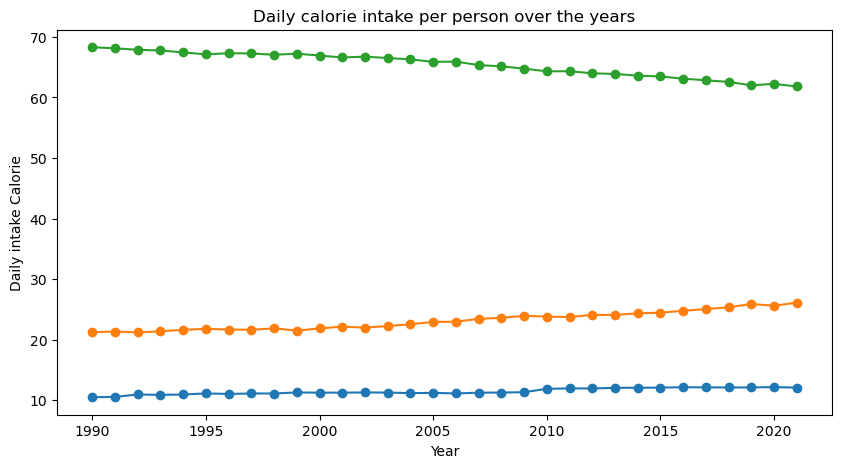

In [21]:
plt.figure(figsize=(10, 5))
for i in value_list[:3]:
    plt.plot(selected_continent_df.index, selected_continent_df[i + '_Asia'], marker='o') 
    plt.title('Daily calorie intake per person over the years')
    plt.xlabel('Year')
    plt.ylabel('Daily intake Calorie')

plt.show()

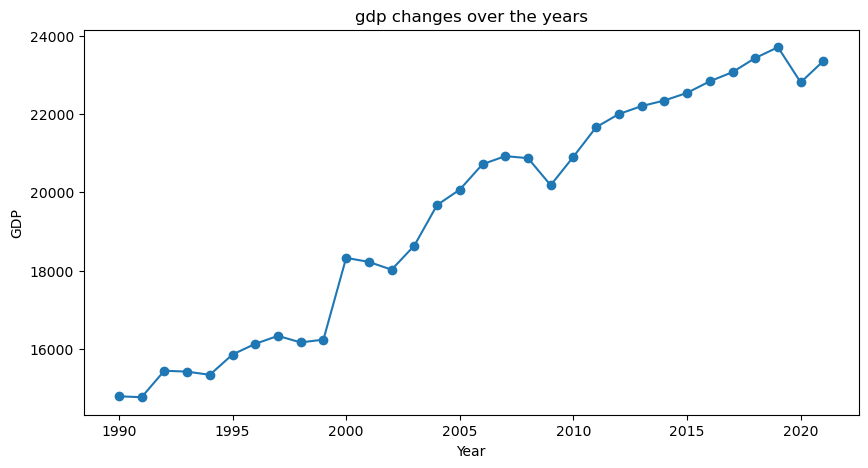

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(selected_continent_df.index, selected_continent_df['GDP_Asia'], marker='o')

plt.title('gdp changes over the years')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.show()

In [23]:
# Calculate the Pearson correlation coefficient between calorie intake and GDP
correlation = {}
for i in value_list[:3]:
    correlation[i] = selected_continent_df[i+'_Asia'].corr(selected_continent_df['GDP_Asia'])
correlation

{'DailyC_Protein': 0.9040733147498611,
 'DailyC_Fat': 0.9518046214178321,
 'DailyC_Carbohydrates': -0.9573951333804684}

We can see that the correlation coefficients are close to 1 or -1, indicating strong linear relationships.

## Relationship with GDP Among the Variables

Let's examine the relationships between the variables and GDP.

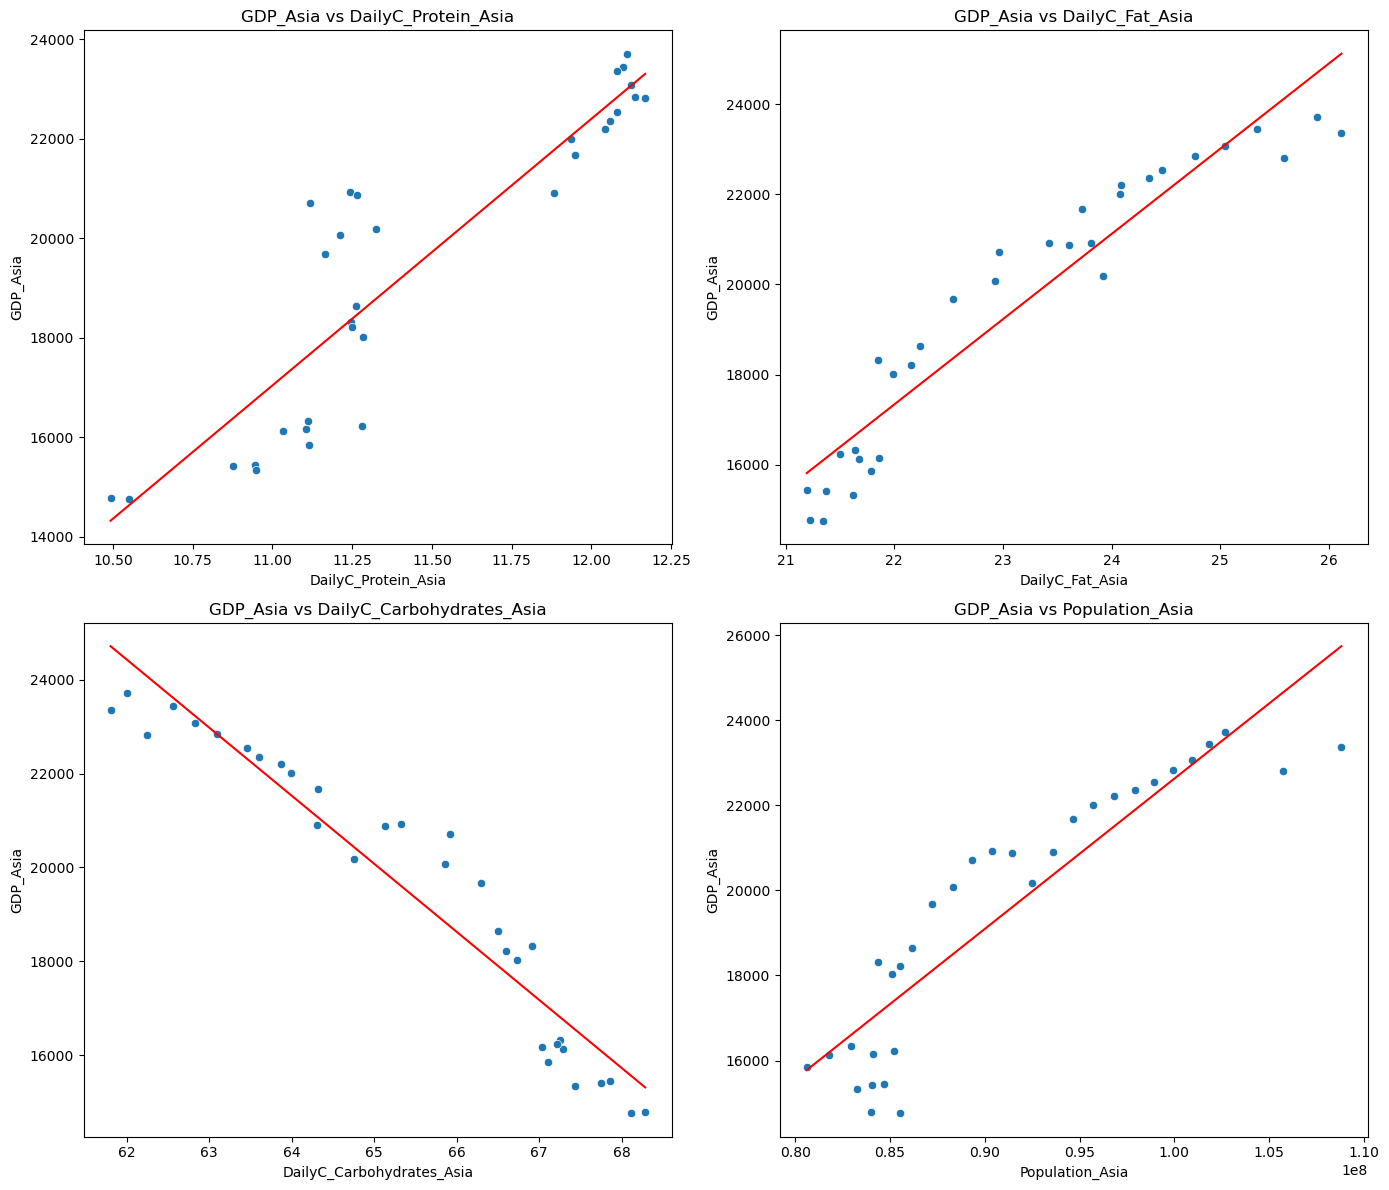

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

analyse_data = ['DailyC_Protein_Asia', 'DailyC_Fat_Asia', 'DailyC_Carbohydrates_Asia', 'Population_Asia']
# Create a graphical window and set the size
plt.figure(figsize=(14, 12))

features = analyse_data
for i, feature in enumerate(features):
    X = selected_continent_df[[feature]]
    y = selected_continent_df['GDP_Asia']

    # Create linear regression objects and fit models
    regression_model = LinearRegression()
    regression_model.fit(X, y)

    plt.subplot(2, 2, i + 1)
    # Plot scatter plots, x is each feature, y is GDP
    sns.scatterplot(x=feature, y='GDP_Asia', data=selected_continent_df)
    
    # Calculate the predicted value of the regression line
    x_values = pd.DataFrame(np.linspace(X[feature].min(), X[feature].max(), 100), columns=[feature])
    y_values = regression_model.predict(x_values)
    
    # Draw the regression line
    sns.lineplot(x=x_values[feature], y=y_values, color='red')

    # Add title and axis labels
    plt.title(f'GDP_Asia vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('GDP_Asia')

plt.tight_layout()
plt.show()

- Observation

Protein and fat intake variables exhibit a **positive** correlation with GDP, suggesting that higher intake of protein and fat is associated with higher GDP.

Conversely, there is a **negative** correlation between carbohydrate intake and GDP, indicating that higher carbohydrate intake is associated with lower GDP.

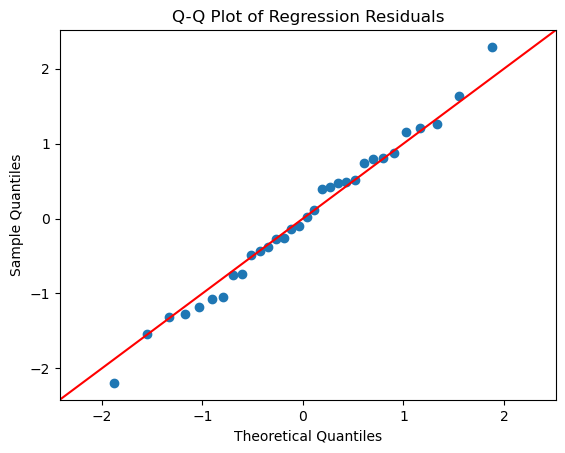

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Adding a constant term (intercept) to a linear regression model
X = selected_continent_df[analyse_data]
X = sm.add_constant(X) # Add constant entries
y = selected_continent_df['GDP_Asia']

# Fit a linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Generate Q-Q plot
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Regression Residuals')
plt.show()


In residual analysis, the Q-Q plot is an intuitive tool used to quickly **check whether the residuals deviate from a normal distribution**.

## We've reviewed the data for countries in Asia; now let's focus on Afghanistan to build a predictive model of GDP based on calorie intake.

# 2.1 Data Preprocessing
We discovered an intriguing dataset on the internet detailing the daily calorie intake from various countries. We aim to determine if it's possible to create a predictive model for GDP based on the calorie intake from animal protein, vegetal protein, fat, and carbohydrates.

In [26]:
import pandas as pd
# read file
df = pd.read_csv('daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv')
df.head()

,Entity,Code,Year,Daily caloric intake per person that comes from animal protein,Daily caloric intake per person that comes from vegetal protein,Daily caloric intake per person from fat,Daily caloric intake per person from carbohydrates
0,Afghanistan,AFG,1961,55.128870,290.84247,343.88312,2365.0508
1,Afghanistan,AFG,1962,54.959705,283.36050,345.01690,2289.9097
2,Afghanistan,AFG,1963,57.932200,256.69678,354.04938,2083.1013
3,Afghanistan,AFG,1964,58.493233,282.30234,357.72510,2314.9219
4,Afghanistan,AFG,1965,61.008570,281.43982,365.04077,2310.2708


In [27]:
df.shape

(12592, 7)

# 2.2 Data Preparation and Cleaning

We decided to focus on the data of Afghanistan between the year from 1961 to 2021.

1. Merge the two datasets on the "Year" column to align the caloric intake data with the corresponding GDP data.
2. Filter the data for the years 1961 to 2018 to ensure we only train the model on years with complete GDP data.
3. Remove unnecessary columns.

In [28]:
# Filter the data for entries where the 'Entity' is 'Afghanistan'
afghanistan_data = df[df['Entity'] == 'Afghanistan']
# Drop the unecessary 'Entity' and 'Code' columns from the DataFrame
afghanistan_data = afghanistan_data.drop(['Entity', 'Code'], axis=1)

afghanistan_data.to_csv('afghanistan_data.csv', index=True)

In [29]:
# Display the filtered data
afghanistan_data.head(), afghanistan_data.shape

(   Year  Daily caloric intake per person that comes from animal protein  \
 0  1961                                          55.128870                
 1  1962                                          54.959705                
 2  1963                                          57.932200                
 3  1964                                          58.493233                
 4  1965                                          61.008570                
 
    Daily caloric intake per person that comes from vegetal protein  \
 0                                          290.84247                 
 1                                          283.36050                 
 2                                          256.69678                 
 3                                          282.30234                 
 4                                          281.43982                 
 
    Daily caloric intake per person from fat  \
 0                                 343.88312   
 1                

- Check if there is any missing value of the data

In [30]:
missing_any = afghanistan_data.isna().any()
print("Any missing values in each column:\n", missing_any)

# Count the total number of missing values in each column
missing_count = afghanistan_data.isna().sum()
print("Count of missing values in each column:\n", missing_count)


Any missing values in each column:
 Year                                                               False
Daily caloric intake per person that comes from animal protein     False
Daily caloric intake per person that comes from vegetal protein    False
Daily caloric intake per person from fat                           False
Daily caloric intake per person from carbohydrates                 False
dtype: bool
Count of missing values in each column:
 Year                                                               0
Daily caloric intake per person that comes from animal protein     0
Daily caloric intake per person that comes from vegetal protein    0
Daily caloric intake per person from fat                           0
Daily caloric intake per person from carbohydrates                 0
dtype: int64


The result shows that we have a complete data:)

- GDP data

In [31]:
gdp_df = pd.read_csv('afghanistan_gdp_per_capita.csv', skiprows=16)
gdp_df.head()

,date,GDP Per Capita (US $),Annual Growth Rate (%),
0,1960-12-31,62.3694,NaN,NaN
1,1961-12-31,62.4437,0.12,NaN
2,1962-12-31,60.9504,-2.39,NaN
3,1963-12-31,82.0217,34.57,NaN
4,1964-12-31,85.5111,4.25,NaN


We want to exract column 'date' and 'GDP Per Capita (US $)' and remove unnecessary columns. For the date, we extract only the year and then change the column name to 'Year'.

In [32]:
gdp_df.columns = gdp_df.columns.str.strip()  # Remove any leading/trailing whitespace
gdp_df = gdp_df[['date', 'GDP Per Capita (US $)']].copy()

gdp_df['Year'] = pd.to_datetime(gdp_df['date']).dt.year
gdp_df.drop('date', axis=1, inplace=True)

gdp_df.head()

,GDP Per Capita (US $),Year
0,62.3694,1960
1,62.4437,1961
2,60.9504,1962
3,82.0217,1963
4,85.5111,1964


In [33]:
afghanistan_gdp = gdp_df[(gdp_df['Year'] >= 1961) & (gdp_df['Year'] <= 2021)]

# Select only the 'Year' and 'GDP per capita' columns
afghanistan_gdp = afghanistan_gdp[['Year', 'GDP Per Capita (US $)']]

afghanistan_gdp.to_csv('afghanistan_gdp.csv', index=True)

In [34]:
# Display the result
afghanistan_gdp.head(), afghanistan_gdp.shape

(   Year  GDP Per Capita (US $)
 1  1961                62.4437
 2  1962                60.9504
 3  1963                82.0217
 4  1964                85.5111
 5  1965               105.2432,
 (41, 2))

- Check if there is any missing value as well.

In [35]:
missing_any_gdp = afghanistan_gdp.isna().any()
print("Any missing values in GDP column:\n", missing_any_gdp)
print("")

missing_count_gdp = afghanistan_gdp.isna().sum()
print("Count of missing values in GDP column:\n", missing_count_gdp)
print("")

# Create a mask where the 'GDP per capita' column is NaN
missing_gdp = afghanistan_gdp['GDP Per Capita (US $)'].isna()
# Use the mask to filter the DataFrame to show only rows with missing GDP values
missing_gdp_rows = afghanistan_gdp[missing_gdp]
# Print the rows with missing GDP values
print("Rows with missing GDP values:\n", missing_gdp_rows)

Any missing values in GDP column:
 Year                     False
GDP Per Capita (US $)    False
dtype: bool

Count of missing values in GDP column:
 Year                     0
GDP Per Capita (US $)    0
dtype: int64

Rows with missing GDP values:
 Empty DataFrame
Columns: [Year, GDP Per Capita (US $)]
Index: []


The result shows that we have a complete data for GDP:) So now we can jump into the model building part.

# 2.3 Model Building

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \epsilon
$$

This is the linear regression model we want to build, where

- $Y$ is the dependent variable (GDP Per Capita (US $) in your case).

- $\beta_0$ is the intercept of the regression line.

- $\beta_1, \beta_2, \beta_3, \beta_4$ are the coefficients for the predictor variables $X_1, X_2, X_3, X_4$ which represent the daily caloric intake from animal protein, vegetal protein, fat, and carbohydrates, respectively.

- $\epsilon$ is the error term, which accounts for the variability in GDP per capita not explained by the caloric intakes.

Let's start by setting up and training the linear regression model.

In [36]:
# Merge the two datasets on the 'Year' column
afghanistan_merged = pd.merge(afghanistan_data, afghanistan_gdp, on='Year')

# Filter the data to include only years from 1961 to 2018
afghanistan_model_data = afghanistan_merged[(afghanistan_merged['Year'] >= 1961) & (afghanistan_merged['Year'] <= 2018)]

# Display the final prepared dataset for model building
afghanistan_model_data.head(), afghanistan_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             38 non-null     int64  
 1   Daily caloric intake per person that comes from animal protein   38 non-null     float64
 2   Daily caloric intake per person that comes from vegetal protein  38 non-null     float64
 3   Daily caloric intake per person from fat                         38 non-null     float64
 4   Daily caloric intake per person from carbohydrates               38 non-null     float64
 5   GDP Per Capita (US $)                                            38 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


(   Year  Daily caloric intake per person that comes from animal protein  \
 0  1961                                          55.128870                
 1  1962                                          54.959705                
 2  1963                                          57.932200                
 3  1964                                          58.493233                
 4  1965                                          61.008570                
 
    Daily caloric intake per person that comes from vegetal protein  \
 0                                          290.84247                 
 1                                          283.36050                 
 2                                          256.69678                 
 3                                          282.30234                 
 4                                          281.43982                 
 
    Daily caloric intake per person from fat  \
 0                                 343.88312   
 1                

## 1. Feature Selection and Data Splitting: 
This part of the code prepares the data, selects the features and target, and then splits the data into training and testing subsets.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for regression
X = afghanistan_model_data[['Daily caloric intake per person that comes from animal protein', 
                 'Daily caloric intake per person that comes from vegetal protein', 
                 'Daily caloric intake per person from fat', 
                 'Daily caloric intake per person from carbohydrates']]
y = afghanistan_model_data['GDP Per Capita (US $)']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Model Training:
Here, the LinearRegression model from scikit-learn is instantiated and trained using the fit method on the training data.

In [38]:
# Initialize and fit the regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 3. Making Predictions and Evaluating the Model:
The trained model is then used to make predictions on the test set. The performance of the model is evaluated using metrics like mean squared error (MSE) and R-squared (R²).

In [39]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate R-squared for both training and validation
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)

(train_score, val_score)

(0.7738927020629556, 0.7180919602511409)

- **Good Model Fit:** An R-squared of 0.774 for training suggests that the model fits the training data well, capturing approximately 77.4% of the variance in GDP per capita. This is a relatively high value, indicating that the model's predictors (daily caloric intake from different sources) are good predictors of the GDP per capita in this context.
- **Strong Validation Performance:** The R-squared of 0.718 for the validation set is notably high, which is particularly important as it indicates that the model generalizes well to new, unseen data. An R-squared close to the training score reduces concerns about overfitting, suggesting that the model is robust and not just tailored to the specifics of the training dataset.

## The mathematical representation of a linear regression model

In [40]:
# Coefficients and intercept from the model
intercept = model.intercept_
coefficients = model.coef_
features = X.columns
X_variables = ['X_1', 'X_2', 'X_3', 'X_4']

# Create the formula
formula_X = f"Y = {intercept:.2f}"
for coef, X_variable in zip(coefficients, X_variables):
    formula_X += f" + ({coef:.2f} * {X_variable})"

# Create the formula string
formula = f"GDP Per Capita (US $) = {intercept:.2f}"
for coef, feature in zip(coefficients, features):
    formula += f" + ({coef:.2f} * {feature})"

# Print the formula
print("Linear Regression Model:")
print(formula_X)
print("")
print(formula)

Linear Regression Model:
Y = 697.77 + (-6.64 * X_1) + (9.66 * X_2) + (2.09 * X_3) + (-1.59 * X_4)

GDP Per Capita (US $) = 697.77 + (-6.64 * Daily caloric intake per person that comes from animal protein) + (9.66 * Daily caloric intake per person that comes from vegetal protein) + (2.09 * Daily caloric intake per person from fat) + (-1.59 * Daily caloric intake per person from carbohydrates)


# 3. Data Visualization & Analysis

# 3.1 Actual vs. Predicted GDP Per Capita Scatter Plot

This plot visually compares the actual GDP per capita values against those predicted by the regression model. Each point represents a year, with the x-axis showing the actual GDP and the y-axis showing the predicted GDP for that year.

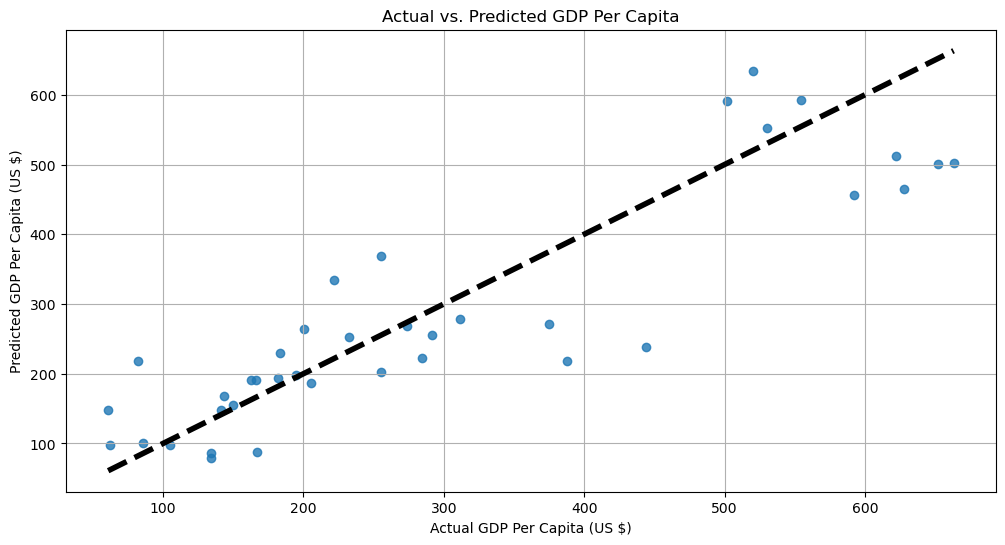

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

# Predictions for both training and validation combined for a complete view
y_pred_full = model.predict(X)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y, y_pred_full, alpha=0.8)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual GDP Per Capita (US $)')
plt.ylabel('Predicted GDP Per Capita (US $)')
plt.title('Actual vs. Predicted GDP Per Capita')
plt.grid(True)
plt.show()

- Observation

The points are scattered around a dashed line, which represents perfect prediction (where actual equals predicted). The closer the points are to this line, the more accurate the predictions are.

- Conclusion

The clustering of points near the diagonal line suggests that the model has a strong predictive capability, indicating that the selected predictors (caloric intake from different sources) are effective in estimating the GDP per capita. This good fit suggests that nutritional improvements or changes in Afghanistan may correlate with economic growth, as reflected in GDP per capita.

# 3.2 Residuals vs. Predicted Plot

This plot shows the residuals (the differences between actual and predicted values) on the y-axis against the predicted GDP values on the x-axis. Ideally, residuals should be randomly distributed around zero, without forming any discernible patterns.

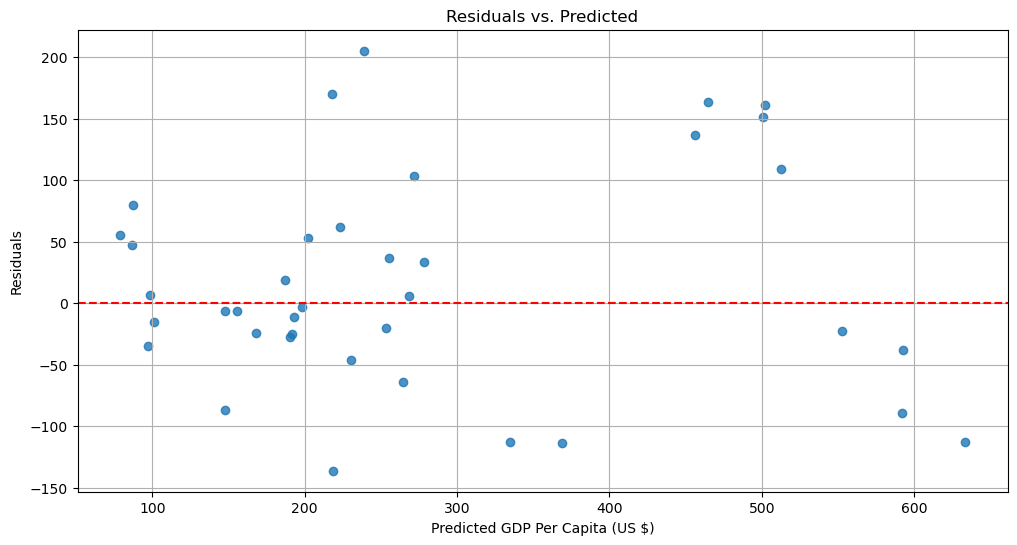

In [42]:
# Residual plot
residuals = y - y_pred_full
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_full, residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.xlabel('Predicted GDP Per Capita (US $)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.grid(True)
plt.show()

- Observation

The plot includes a horizontal dashed red line at zero to indicate where residuals would equal zero. Points scattered evenly around this line would indicate a model that predicts without bias.

- Conclusion

Residuals appear random and centered around zero without clear patterns, it suggests that the model does not suffer from heteroscedasticity or other systematic errors. However, any pattern or systematic deviation from zero could indicate model deficiencies, such as underfitting or overfitting, or that certain predictive factors have been missed.

# 3.3 Coefficient Importance Plot

This bar chart shows the magnitude and direction of the coefficients of each predictor variable in the model. The length of each bar indicates the size of the coefficient, and its direction (above or below zero) indicates whether the relationship with the GDP per capita is positive or negative.

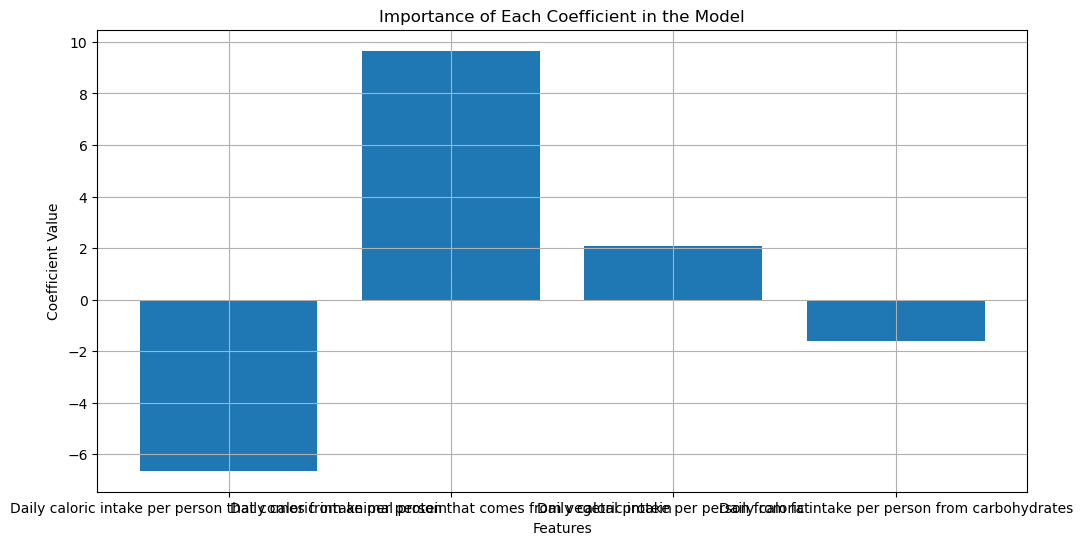

In [43]:
# Coefficient importance plot
features = X.columns
plt.figure(figsize=(12, 6))
plt.bar(features, model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Importance of Each Coefficient in the Model')
plt.grid(True)
plt.show()

- Observation

Positive coefficients suggest that an increase in the predictor (e.g., caloric intake from vegetal protein) is associated with an increase in GDP per capita. Conversely, negative coefficients suggest an inverse relationship.

- Conclusion

This plot helps identify which factors are most important in predicting GDP per capita. For instance, a large positive coefficient for vegetal protein intake suggests that policies encouraging increased consumption of plant-based proteins could have a beneficial economic impact. Conversely, negative coefficients might prompt a reevaluation of certain dietary components.

# 3.4 Actual vs. Predicted GDP Per Capita Over Time

This line plot compares the actual GDP per capita over time (shown with markers) against the predicted GDP per capita (shown with a dashed line). It provides a temporal view of the model's performance across different years.

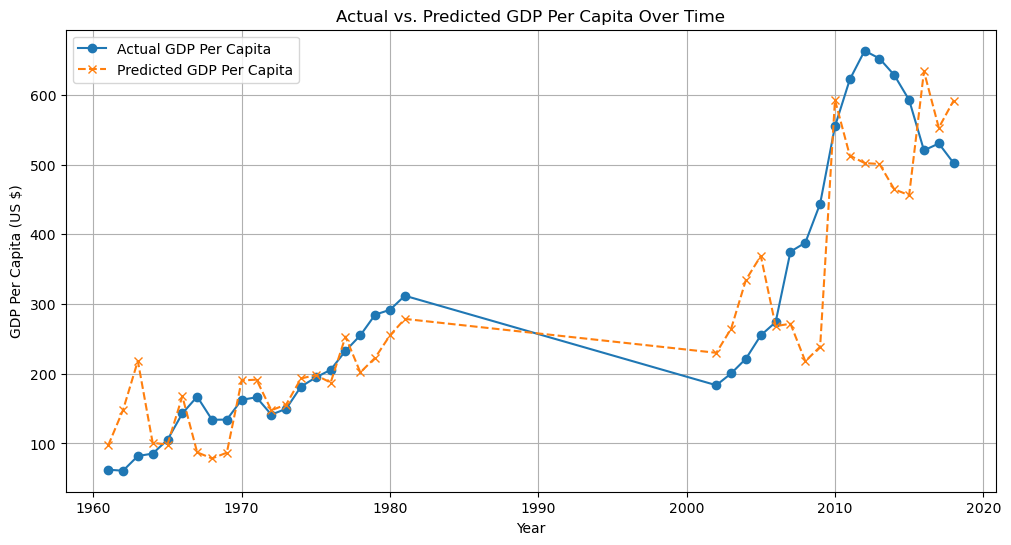

In [44]:
# Line plot of actual vs predicted GDP Per Capita over time
plt.figure(figsize=(12, 6))
plt.plot(afghanistan_model_data['Year'], y, label='Actual GDP Per Capita', marker='o')
plt.plot(afghanistan_model_data['Year'], y_pred_full, label='Predicted GDP Per Capita', linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (US $)')
plt.title('Actual vs. Predicted GDP Per Capita Over Time')
plt.legend()
plt.grid(True)
plt.show()

- Observation

Consistent closeness of the predicted line to the actual markers across the years indicates consistent model performance over time. Significant deviations would indicate years where the model did not perform well.

- Conclusion

A consistent match between actual and predicted values over time would confirm the model's stability and robustness across different economic conditions. If discrepancies are observed in specific periods, this could indicate external factors affecting GDP that are not captured by the model, suggesting areas for further investigation or model enhancement.